In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten
from keras.models import Sequential,Model
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
#data = pd.read_csv('2017EE30515.csv',header=None)
#X = np.array(data.iloc[:,:784]/255 - 0.5)
#X = X.reshape(len(X),28,28,1)
#t = np.array(data.iloc[:,784])

In [3]:
(X_train,t_train),(X_val,t_val) = mnist.load_data()

In [4]:
X_train = X_train.reshape(len(X_train),28,28,1)
X_val = X_val.reshape(len(X_val),28,28,1)

In [5]:
t_train_oh = np.zeros((len(t_train),10))
t_train_oh[np.arange(len(t_train)),t_train] = 1

t_val_oh = np.zeros((len(t_val),10))
t_val_oh[np.arange(len(t_val)),t_val] = 1

In [6]:
model = Sequential()
model.add(Conv2D(64,(5,5),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                247872    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
__________

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
history = model.fit(X_train,t_train_oh,batch_size=100,epochs=10,validation_data=(X_val,t_val_oh),verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 33s 554us/step - loss: 1.7955 - acc: 0.8040 - val_loss: 0.0880 - val_acc: 0.9728
Epoch 2/10
60000/60000 [==============================] - 30s 499us/step - loss: 0.1803 - acc: 0.9475 - val_loss: 0.0594 - val_acc: 0.9812
Epoch 3/10
60000/60000 [==============================] - 30s 497us/step - loss: 0.1358 - acc: 0.9606 - val_loss: 0.0518 - val_acc: 0.9835
Epoch 4/10
60000/60000 [==============================] - 30s 497us/step - loss: 0.1140 - acc: 0.9665 - val_loss: 0.0450 - val_acc: 0.9859
Epoch 5/10
60000/60000 [==============================] - 30s 497us/step - loss: 0.1036 - acc: 0.9692 - val_loss: 0.0469 - val_acc: 0.9841
Epoch 6/10
60000/60000 [==============================] - 30s 497us/step - loss: 0.0976 - acc: 0.9720 - val_loss: 0.0494 - val_acc: 0.9831
Epoch 7/10
60000/60000 [==============================] - 30s 497us/step - loss: 0.0887 - acc: 0.9735 - val_loss: 0.

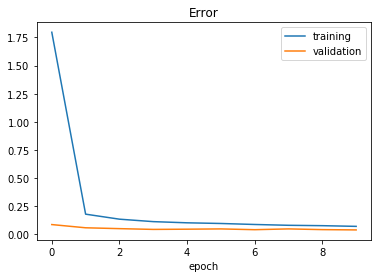

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Error')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

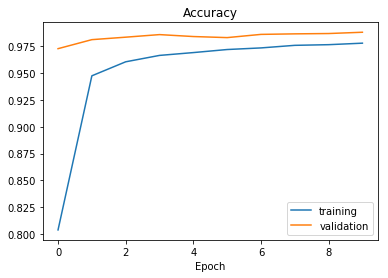

In [10]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

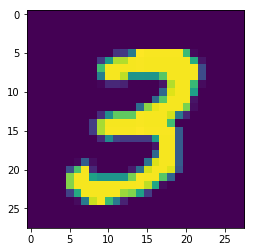

In [11]:
ex = 7
plt.imshow(X_train[ex].reshape(28,28))

In [12]:
activations = Model(inputs=model.input,outputs=[layer.output for layer in model.layers])
act = activations.predict(X_train[ex].reshape((1,28,28,1)))

In [13]:
print([l.name for l in model.layers])

['conv2d_1', 'conv2d_2', 'max_pooling2d_1', 'dropout_1', 'flatten_1', 'dense_1', 'dropout_2', 'dense_2']


In [14]:
layer_num = 2
print(model.layers[layer_num].name)
print(act[layer_num].shape)

max_pooling2d_1
(1, 11, 11, 32)


max_pooling2d_1


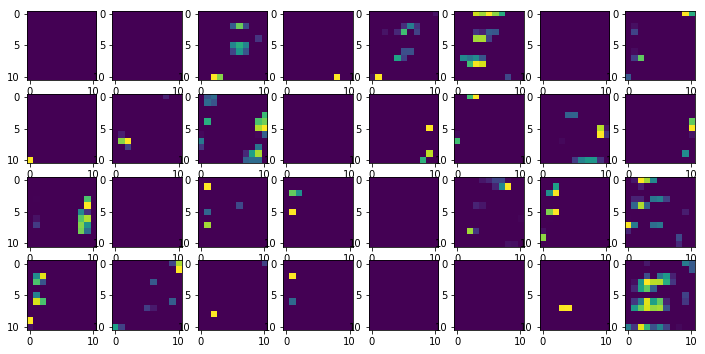

In [15]:
plt.figure(figsize=(12,12))
print(model.layers[layer_num].name)
for i in range(32):
    plt.subplot(8,8,i+1)
    plt.imshow(act[layer_num][0,:,:,i])